# IPL Deliveries Dataset – Exploratory Data Analysis (EDA)

The **Indian Premier League (IPL)** is one of the most popular and competitive T20 cricket leagues in the world, featuring top players from around the globe. In this project, we perform an Exploratory Data Analysis (EDA) on the IPL deliveries dataset to uncover hidden insights, patterns, and trends within match-level data.

The dataset captures ball-by-ball information for every IPL match — including details like the batter, bowler, runs scored, wickets taken, extras, and more. 

## Step 1: Import Libraries

In [9]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Better visuals in Jupyter
%matplotlib inline
sns.set(style="whitegrid")


## Step 2: Load the Dataset

In [11]:
# Step 2: Load the IPL Deliveries Dataset
df = pd.read_csv("C:/Users/kuruv/Downloads/deliveries.csv")

# Quick preview
df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


## Step 3: Basic Info & Summary of the Dataset

In [170]:
# Shape of the dataset
print("Shape of the dataset (rows, columns):", df.shape)


Shape of the dataset (rows, columns): (260920, 17)


our data has 2 lakh plus rows and 17 columns.

Let us go and understand what are all there in these rows and columns

In [15]:
# Column-wise data types and non-null values
print("\nData Info:")
df.info()


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non

In [172]:
# Summary statistics for numeric columns
print("\nStatistical Summary:")
df.describe()



Statistical Summary:


,match_id,inning,over,ball,batsman_runs,extra_runs,total_runs,is_wicket
count,2.609200e+05,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000,260920.000000
mean,9.070665e+05,1.483531,9.197677,3.624486,1.265001,0.067806,1.332807,0.049632
std,3.679913e+05,0.502643,5.683484,1.814920,1.639298,0.343265,1.626416,0.217184
min,3.359820e+05,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.483340e+05,1.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,9.809670e+05,1.000000,9.000000,4.000000,1.000000,0.000000,1.000000,0.000000
75%,1.254066e+06,2.000000,14.000000,5.000000,1.000000,0.000000,1.000000,0.000000
max,1.426312e+06,6.000000,19.000000,11.000000,6.000000,7.000000,7.000000,1.000000


In [16]:
print("\nColumn Names:")
print(df.columns.tolist()) 



Column Names:
['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket', 'player_dismissed', 'dismissal_kind', 'fielder']


## Preprocessing of the data


Let us find out whether our dataset consists of duplicate values

In [177]:
duplicates = df[df.duplicated()]

# Display the duplicates
print(duplicates)

Empty DataFrame
Columns: [match_id, inning, batting_team, bowling_team, over, ball, batter, bowler, non_striker, batsman_runs, extra_runs, total_runs, extras_type, is_wicket, player_dismissed, dismissal_kind, fielder]
Index: []


In [179]:
# Count the number of duplicate rows
duplicate_count = df.duplicated().sum()

print(f'Number of duplicate rows: {duplicate_count}')


Number of duplicate rows: 0


We do not have any duplicate values in our dataset.

Now let's findout the unique values in each column

### 1. match_id

The `match_id` column uniquely identifies each IPL match. This column helps to group deliveries by match to analyze match-level statistics such as total runs, wickets, and performance trends across different matches.


In [19]:
# Exploring match_id
df['match_id']


0          335982
1          335982
2          335982
3          335982
4          335982
           ...   
260915    1426312
260916    1426312
260917    1426312
260918    1426312
260919    1426312
Name: match_id, Length: 260920, dtype: int64

In [20]:
df['match_id'].unique()

array([ 335982,  335983,  335984, ..., 1426310, 1426311, 1426312],
      dtype=int64)

In [21]:
df['match_id'].nunique()

1095

We have 1095 unique match_ids in the dataset. This means the dataset contains data for 1095 IPL matches. The total number of rows (260,920) is much higher because each row represents a single delivery in a match, not the match itself.

So, we will consider this column for match-level analysis going forward.

### 2. inning

The `inning` column indicates whether the delivery occurred in the 1st or 2nd inning of the match. This is useful for comparing team performance across both innings — for example, how run rates or wicket patterns differ between the 1st and 2nd innings.


In [24]:
df['inning']

0         1
1         1
2         1
3         1
4         1
         ..
260915    2
260916    2
260917    2
260918    2
260919    2
Name: inning, Length: 260920, dtype: int64

In [25]:
#checking out the unique values
df['inning'].unique()

array([1, 2, 3, 4, 5, 6], dtype=int64)

In [26]:
df['inning'].nunique()

6

We found 6 unique values in the inning column, even though a typical IPL match has only 2 innings — one for each team.

This suggests that some matches included Super Overs, which are played to break ties and are recorded as additional innings (usually the 3rd and 4th). The presence of the 5th and 6th innings likely indicates rare cases with multiple Super Overs.

This is important to keep in mind during analysis, especially when comparing performance metrics between regular innings and Super Over scenarios. So, we will consider this column for further analysis.

### 3.  batting_team

The `batting_team` column shows the team that was batting during each delivery. Analyzing this helps us understand team-wise batting contributions and delivery patterns over seasons. We can also identify high-scoring teams or teams with deep batting line-ups.


In [29]:
df['batting_team']

0         Kolkata Knight Riders
1         Kolkata Knight Riders
2         Kolkata Knight Riders
3         Kolkata Knight Riders
4         Kolkata Knight Riders
                  ...          
260915    Kolkata Knight Riders
260916    Kolkata Knight Riders
260917    Kolkata Knight Riders
260918    Kolkata Knight Riders
260919    Kolkata Knight Riders
Name: batting_team, Length: 260920, dtype: object

In [30]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Royal Challengers Bangalore',
       'Chennai Super Kings', 'Kings XI Punjab', 'Rajasthan Royals',
       'Delhi Daredevils', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [31]:
df['batting_team'].nunique()

19

The batting_team column contains 19 unique teams, reflecting all franchises that have participated in the IPL over different seasons. This includes both active teams (like Mumbai Indians and Chennai Super Kings) and other teams (like Deccan Chargers, Delhi Daredevils, and Rising Pune Supergiant).

Analyzing this column helps us understand team-wise batting performances, compare run patterns, and evaluate the strength of different batting line-ups across seasons.

Therefore, we will consider this column for team-level performance analysis in our exploration.

### 4. bowling_team

The `bowling_team` column shows which team was bowling during the delivery. This allows us to assess bowling strength, defensive capabilities, and team-wise wicket-taking patterns.


In [34]:
df['bowling_team']

0         Royal Challengers Bangalore
1         Royal Challengers Bangalore
2         Royal Challengers Bangalore
3         Royal Challengers Bangalore
4         Royal Challengers Bangalore
                     ...             
260915            Sunrisers Hyderabad
260916            Sunrisers Hyderabad
260917            Sunrisers Hyderabad
260918            Sunrisers Hyderabad
260919            Sunrisers Hyderabad
Name: bowling_team, Length: 260920, dtype: object

In [35]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Kings XI Punjab', 'Chennai Super Kings', 'Delhi Daredevils',
       'Rajasthan Royals', 'Mumbai Indians', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants',
       'Royal Challengers Bengaluru'], dtype=object)

In [36]:
df['bowling_team'].nunique()

19

The bowling_team column contains 19 unique teams, just like the batting_team column. This reflects all the franchises that have bowled in the IPL, including both current and former teams (like Mumbai Indians, Chennai Super Kings, Deccan Chargers, and Delhi Daredevils).

Analyzing this column will help us evaluate the bowling strength of different teams, their defensive capabilities, and patterns in wicket-taking over the seasons.

So, we will consider this column for team-level bowling performance analysis going forward.

### 5. over 

The `over` column represents the over number within an innings. This is key in analyzing scoring patterns — like death overs, powerplay performances, and middle-over pressure handling.


In [39]:
df['over']

0          0
1          0
2          0
3          0
4          0
          ..
260915     9
260916     9
260917    10
260918    10
260919    10
Name: over, Length: 260920, dtype: int64

In [40]:
df['over'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

In [41]:
df['over'].nunique()

20

The over column has 20 unique values, ranging from 0 to 19. The over number indicates the over within an innings, with 0 representing the first delivery of the innings and 19 representing the last delivery in the 20th over.

This column is important for analyzing scoring patterns, like how teams perform during the powerplay overs (the first 6 overs), middle overs, and death overs (the last few overs of the innings).

So, we will consider this column for over-based analysis to study team performance in different phases of the match.



### 6. ball 

The `ball` column shows which delivery of the over was bowled (1 to 6, sometimes more in case of extras). It helps in micro-analysis of overs, such as evaluating bowler consistency and pressure deliveries.


In [44]:
df['ball']

0         1
1         2
2         3
3         4
4         5
         ..
260915    5
260916    6
260917    1
260918    2
260919    3
Name: ball, Length: 260920, dtype: int64

In [45]:
df['ball'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [46]:
df['ball'].nunique()

11


The `ball` column indicates the delivery number within an over — usually ranging from **1 to 6**, representing the six standard legal deliveries. However, due to **extras** like wides and no-balls, some overs contain more deliveries, which explains values going up to **11** in this dataset.

Analyzing this column allows for:
- **Micro-analysis of overs**: spotting pressure points or momentum shifts.
- **Bowler performance under pressure**: such as 5th or 6th ball effectiveness.
- **Impact of extras**: identifying bowlers who concede more extra deliveries.

 `df['ball'].nunique()` returns **11**, confirming the presence of overs that extended due to extras.

So we will consider this column for further analysis.

### 7. batter

The `batter` column shows the player on strike for the delivery. This allows batter-wise performance analysis, such as total runs, boundaries, strike rates, and dismissal types.


In [49]:
df['batter']

0          SC Ganguly
1         BB McCullum
2         BB McCullum
3         BB McCullum
4         BB McCullum
             ...     
260915        SS Iyer
260916        VR Iyer
260917        VR Iyer
260918        SS Iyer
260919        VR Iyer
Name: batter, Length: 260920, dtype: object

In [50]:
df['batter'].unique()

array(['SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'R Dravid', 'W Jaffer', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'PA Patel', 'ML Hayden', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'K Goel',
       'JR Hopes', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'T Kohli', 'YK Pathan', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'G Gambhir', 'V Sehwag', 'S Dhawan', 'L Ronchi',
       'ST Jayasuriya', 'DJ Thornely', 'RV Uthappa', 'PR Shah',
       'AM Nayar', 'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul',
       'LRPL Taylor', 'AC Gilchrist', 'Y Venugopal Rao', 'VVS Laxman',
       'A Symonds', 'RG Sharma', 'SB Styris', 'AS Yadav', 'SB Bangar',
       'WPUJC Vaas', 'RP Singh', 'WP Saha', 'LR Shukla',
       'DPMD Jayawardene', 'S Sohal', 'B Lee', 'PP Cha

In [51]:
df['batter'].nunique()

673



The `batter` column represents the **striker** — the player facing the delivery on each ball. This field is central to analyzing:

- **Individual performances**: runs scored, boundaries, strike rates, and dismissals.
- **Partnership trends**: tracking contributions and synergy between batters.
- **Match context**: understanding how key players perform under pressure or in specific overs.

 The dataset includes **673 unique batters**, reflecting the rich history and diversity of players who have participated in IPL over the years.

 So, we will consider this column for batter-based analysis to see how each player performs in different situations.


###  8. bowler

The `bowler` column contains the name of the bowler who bowled the delivery. It is useful in identifying top-performing bowlers, their economy, and wicket-taking ability across seasons.


In [54]:
df['bowler']

0               P Kumar
1               P Kumar
2               P Kumar
3               P Kumar
4               P Kumar
              ...      
260915       AK Markram
260916       AK Markram
260917    Shahbaz Ahmed
260918    Shahbaz Ahmed
260919    Shahbaz Ahmed
Name: bowler, Length: 260920, dtype: object

In [55]:
df['bowler'].unique()

array(['P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi',
       'CL White', 'AB Dinda', 'I Sharma', 'AB Agarkar', 'SC Ganguly',
       'LR Shukla', 'B Lee', 'S Sreesanth', 'JR Hopes', 'IK Pathan',
       'K Goel', 'PP Chawla', 'WA Mota', 'JDP Oram', 'MS Gony',
       'M Muralitharan', 'P Amarnath', 'Joginder Sharma', 'GD McGrath',
       'B Geeves', 'MF Maharoof', 'R Bhatia', 'DL Vettori', 'MM Patel',
       'SR Watson', 'SK Trivedi', 'SK Warne', 'YK Pathan', 'D Salunkhe',
       'R Vinay Kumar', 'B Akhil', 'A Nehra', 'SM Pollock', 'DS Kulkarni',
       'ST Jayasuriya', 'Harbhajan Singh', 'AM Nayar', 'M Kartik',
       'Mohammad Hafeez', 'DJ Hussey', 'WPUJC Vaas', 'RP Singh',
       'SB Styris', 'SB Bangar', 'A Symonds', 'PP Ojha', 'Pankaj Singh',
       'Mohammad Asif', 'VY Mahesh', 'Shahid Afridi', 'DJ Bravo',
       'VS Yeligati', 'MA Khote', 'D Kalyankrishna', 'VRV Singh',
       'Sohail Tanvir', 'A Kumble', 'DNT Zoysa', 'SD Chitnis',
       'Yuvraj Singh', 'Shoaib Malik',

In [56]:
df['bowler'].nunique()

530

we got 530 unique values for the bowler column. We will consider this column for further analysis.

### 9. non-Striker
The `non_striker` column in the dataset captures the name of the batter who is positioned at the **non-striker's end** during a particular delivery. This batter is not facing the ball but plays an essential role in the game. Their contributions include:

1. **Running Between the Wickets**: The non-striker runs toward the striker's end when a run is taken.
2. **Partnership Analysis**: The column helps track the partnership between two batters, providing insights into their combined performance.
3. **Strategic Role**: The non-striker can influence the batting team's strategy, including rotating the strike or supporting the striker during a challenging phase of play.

This column is crucial for analyzing batter pairings, rotation of strike, and other aspects of batting performance that go beyond individual runs scored.
We will consider this column for further analysis.


In [59]:
df['non_striker']

0         BB McCullum
1          SC Ganguly
2          SC Ganguly
3          SC Ganguly
4          SC Ganguly
             ...     
260915        VR Iyer
260916        SS Iyer
260917        SS Iyer
260918        VR Iyer
260919        SS Iyer
Name: non_striker, Length: 260920, dtype: object

In [60]:
df['non_striker'].unique()

array(['BB McCullum', 'SC Ganguly', 'RT Ponting', 'DJ Hussey',
       'Mohammad Hafeez', 'W Jaffer', 'R Dravid', 'V Kohli', 'JH Kallis',
       'CL White', 'MV Boucher', 'B Akhil', 'AA Noffke', 'P Kumar',
       'Z Khan', 'SB Joshi', 'ML Hayden', 'PA Patel', 'MEK Hussey',
       'MS Dhoni', 'SK Raina', 'JDP Oram', 'S Badrinath', 'JR Hopes',
       'K Goel', 'KC Sangakkara', 'Yuvraj Singh', 'SM Katich',
       'IK Pathan', 'YK Pathan', 'T Kohli', 'SR Watson', 'M Kaif',
       'DS Lehmann', 'RA Jadeja', 'M Rawat', 'D Salunkhe', 'SK Warne',
       'SK Trivedi', 'V Sehwag', 'G Gambhir', 'S Dhawan', 'ST Jayasuriya',
       'L Ronchi', 'DJ Thornely', 'RV Uthappa', 'PR Shah', 'AM Nayar',
       'SM Pollock', 'Harbhajan Singh', 'S Chanderpaul', 'LRPL Taylor',
       'Y Venugopal Rao', 'AC Gilchrist', 'VVS Laxman', 'A Symonds',
       'SB Styris', 'AS Yadav', 'SB Bangar', 'WPUJC Vaas', 'RP Singh',
       'PP Ojha', 'WP Saha', 'LR Shukla', 'DPMD Jayawardene', 'S Sohal',
       'PP Chawla', 'WA M

In [61]:
df['non_striker'].nunique()

663


The `non_striker` column represents the name of the batter at the non-striker's end, which is essential for analyzing partnerships, runner statistics, and batter pair trends in cricket matches.

- The unique values in this column represent the players who have been at the non-striker's end during matches.
- There are a total of **663 unique non-strikers** recorded in this dataset.
- Some notable players in this column include well-known cricketers such as `BB McCullum`, `SC Ganguly`, `RT Ponting`, `MS Dhoni`, `V Kohli`, and many others.
  
We will consider this column for further analysis.

### 10. batsman_runs

The `batsman_runs` column contains the number of runs scored off the bat for that delivery. This is the main metric for calculating strike rates, partnerships, and individual performance of a batter.


In [64]:
df['batsman_runs']

0         0
1         0
2         0
3         0
4         0
         ..
260915    1
260916    1
260917    1
260918    1
260919    1
Name: batsman_runs, Length: 260920, dtype: int64

In [65]:
df['batsman_runs'].unique()

array([0, 4, 6, 1, 2, 5, 3], dtype=int64)

In [66]:
df['batsman_runs'].nunique()

7


- **Unique Values:** `[0, 4, 6, 1, 2, 5, 3]`
- **Total Unique Run Types:** `7`

These values reflect all possible run outcomes off the bat, including boundaries and odd run instances like 5s, helping in detailed performance analysis.

We will consider this column for further analysis.


### 11. extra_runs

This column indicates the number of runs awarded as extras (wides, no-balls, etc.). Analyzing extra runs helps in evaluating bowling discipline and its impact on total score.


In [69]:
df['extra_runs']

0         1
1         0
2         1
3         0
4         0
         ..
260915    0
260916    0
260917    0
260918    0
260919    0
Name: extra_runs, Length: 260920, dtype: int64

In [70]:
df['extra_runs'].unique()

array([1, 0, 5, 4, 2, 3, 7], dtype=int64)

In [71]:
df['extra_runs'].nunique()

7



The output `df['extra_runs'].nunique()` returns **7**, which means there are **7 unique values** in the `extra_runs` column. These values represent the number of runs awarded as extras in a delivery, and they range from 0 to 7. The presence of extras like wides, no-balls, and byes can significantly impact the total score, especially in closely contested matches. Monitoring and minimizing extra runs is crucial for maintaining bowling discipline and improving team performance.

We will consider this column for further analysis.

###  12. total_runs

The `total_runs` column is the sum of batsman runs and extra runs. It reflects the total score update for that delivery and is key for innings-level, match-level, and over-wise run analysis.


In [74]:
df['total_runs']

0         1
1         0
2         1
3         0
4         0
         ..
260915    1
260916    1
260917    1
260918    1
260919    1
Name: total_runs, Length: 260920, dtype: int64

In [75]:
df['total_runs'].unique()

array([1, 0, 4, 6, 5, 2, 3, 7], dtype=int64)

In [76]:
df['total_runs'].nunique()

8



The output `df['total_runs'].nunique()` returns **8**, indicating there are **8 unique values** in the `total_runs` column. This column represents the **complete run contribution** for each delivery, including both the batsman’s runs and any extras. The values range from 0 to 7, showing the variety of scoring outcomes per ball. Analyzing `total_runs` is essential for understanding how runs accumulate during an innings, assessing player contributions, and evaluating over-by-over or match-level scoring patterns.

We will consider this column for further analysis.

### 13.  extras_type

This column details the type of extra (like wide, no-ball, bye, etc.). It is useful to assess what kind of extras bowlers are conceding and which teams are more prone to giving away free runs.


In [79]:
df['extras_type']

0         legbyes
1             NaN
2           wides
3             NaN
4             NaN
           ...   
260915        NaN
260916        NaN
260917        NaN
260918        NaN
260919        NaN
Name: extras_type, Length: 260920, dtype: object

In [80]:
df['extras_type'].unique()

array(['legbyes', nan, 'wides', 'byes', 'noballs', 'penalty'],
      dtype=object)

In [81]:
df['extras_type'].nunique()

5


The output `df['extras_type'].nunique()` returns **5**, indicating that there are **5 distinct types of extras** recorded in the dataset (excluding `NaN` values where no extra was recorded). Understanding the variety and frequency of these extras helps evaluate bowling discipline and team performance in terms of conceding free runs.

Here’s what each extras type means:

- **legbyes**: Runs taken while the ball hits the batsman's body or pads (not the bat), and no attempt is made to hit the ball.
- **wides**: A delivery bowled too far from the batsman to hit, resulting in an extra run and an additional ball in the over.
- **byes**: Runs scored when the batsman misses the ball completely and the ball eludes the wicketkeeper.
- **noballs**: An illegal delivery (e.g., overstepping the crease), awarding an extra run and a free hit in limited-overs formats.
- **penalty**: Rare extras awarded by the umpire for serious rule violations (e.g., ball tampering or time wasting).

These categories help in pinpointing not just how many extras are given, but also **what kinds**—which is critical for performance improvement and strategy refinement.

We consider this column for further analysis.

### 14. is_wicket

This column shows whether a wicket fell on the delivery (1 for yes, 0 for no). It's useful for calculating dismissal patterns, average balls per wicket, and bowler effectiveness.


In [84]:
df['is_wicket']

0         0
1         0
2         0
3         0
4         0
         ..
260915    0
260916    0
260917    0
260918    0
260919    0
Name: is_wicket, Length: 260920, dtype: int64

In [85]:
df['is_wicket'].unique()

array([0, 1], dtype=int64)

In [86]:
df['is_wicket'].nunique()

2



The output `df['is_wicket'].nunique()` returns **2**, indicating that there are **2 unique values** in the `is_wicket` column: **0** and **1**. 

- **1** signifies that a wicket fell on that delivery.
- **0** means no wicket fell.

This binary column is crucial for analyzing bowler effectiveness, calculating **balls per wicket**, and understanding **wicket-taking patterns** across the innings. By assessing the frequency of wickets, we can evaluate a bowler's impact on the game, and also examine team strategies that may influence wicket-taking opportunities.

We consider this column for further analysis.

### 15. player_dismissed

This column contains the name of the batter who got out (if any) on the delivery. It is used for player-wise wicket analysis and to understand which players are most frequently dismissed.


In [89]:
df['player_dismissed']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
260915    NaN
260916    NaN
260917    NaN
260918    NaN
260919    NaN
Name: player_dismissed, Length: 260920, dtype: object

In [90]:
df['player_dismissed'].unique()

array([nan, 'SC Ganguly', 'RT Ponting', 'DJ Hussey', 'R Dravid',
       'V Kohli', 'JH Kallis', 'W Jaffer', 'MV Boucher', 'B Akhil',
       'CL White', 'AA Noffke', 'Z Khan', 'SB Joshi', 'PA Patel',
       'ML Hayden', 'MS Dhoni', 'SK Raina', 'JDP Oram', 'K Goel',
       'JR Hopes', 'Yuvraj Singh', 'KC Sangakkara', 'T Kohli',
       'YK Pathan', 'SR Watson', 'DS Lehmann', 'M Kaif', 'M Rawat',
       'RA Jadeja', 'SK Warne', 'V Sehwag', 'L Ronchi', 'DJ Thornely',
       'ST Jayasuriya', 'PR Shah', 'RV Uthappa', 'AM Nayar', 'SM Pollock',
       'S Chanderpaul', 'LRPL Taylor', 'Y Venugopal Rao', 'VVS Laxman',
       'AC Gilchrist', 'RG Sharma', 'SB Styris', 'AS Yadav', 'A Symonds',
       'WPUJC Vaas', 'SB Bangar', 'PP Ojha', 'BB McCullum', 'WP Saha',
       'Mohammad Hafeez', 'DPMD Jayawardene', 'IK Pathan', 'B Lee',
       'S Sohal', 'Kamran Akmal', 'Shahid Afridi', 'G Gambhir',
       'MEK Hussey', 'DJ Bravo', 'MA Khote', 'Harbhajan Singh',
       'GC Smith', 'D Salunkhe', 'RR Sarwan',

In [91]:
df['player_dismissed'].nunique()

629



The output `df['player_dismissed'].nunique()` returns **629**, indicating that a total of **629 unique players** have been dismissed across the dataset. This column provides valuable insights into **player-wise dismissal patterns**, allowing us to analyze which players have been most frequently dismissed and understand the types of wickets they are getting out on.

By examining the players' names, we can assess the impact of specific batsmen on the match and evaluate the consistency or vulnerability of players facing different bowlers or conditions. This information is helpful for team strategies and for tracking player performance across various matches.


In [93]:
df.isnull()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
260916,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
260917,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
260918,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [94]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

### 16. dismissal_kind

Gives the method of dismissal — bowled, caught, LBW, etc. Helps identify bowling strategies and fielder involvement.


In [96]:
# Exploring dismissal_kind
print("Dismissal types:", df['dismissal_kind'].unique())
df['dismissal_kind'].value_counts()


Dismissal types: [nan 'caught' 'bowled' 'run out' 'lbw' 'retired hurt' 'stumped'
 'caught and bowled' 'hit wicket' 'obstructing the field' 'retired out']


dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64

In [97]:
df['dismissal_kind']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
260915    NaN
260916    NaN
260917    NaN
260918    NaN
260919    NaN
Name: dismissal_kind, Length: 260920, dtype: object

In [98]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'retired hurt',
       'stumped', 'caught and bowled', 'hit wicket',
       'obstructing the field', 'retired out'], dtype=object)

In [99]:
df['dismissal_kind'].nunique()

10

### Analysis of `dismissal_kind` Column

The `dismissal_kind` column contains the method of dismissal for each delivery (if applicable). It can provide insights into **bowling strategies** and **fielder involvement** throughout the match. The possible dismissal methods include:

- **Caught**
- **Bowled**
- **Run Out**
- **LBW (Leg Before Wicket)**
- **Retired Hurt**
- **Stumped**
- **Caught and Bowled**
- **Hit Wicket**
- **Obstructing the Field**
- **Retired Out**

#### Unique Dismissal Types:
The unique dismissal methods found in the dataset are as follows:

- `nan` (no dismissal)
- `caught`
- `bowled`
- `run out`
- `lbw`
- `retired hurt`
- `stumped`
- `caught and bowled`
- `hit wicket`
- `obstructing the field`
- `retired out`

#### Dismissal Frequency:
Here is a brief look at the distribution of different types of dismissals:

- **Caught:** A significant number of dismissals, showing the importance of fielding and bowling strategies to induce shots leading to catches.
- **Bowled and LBW:** Indicates bowlers' effectiveness, showing how many times the batter was dismissed due to the bowlers' skill.
- **Run Out & Stumped:** These are largely due to fielding precision and wicketkeeping skills.
- **Retired Hurt/Out, Hit Wicket, and Obstructing the Field:** These are rarer dismissals, which may indicate unusual situations or strategies.

By analyzing the `dismissal_kind` column, we can assess which dismissals occur most frequently and gain insights into the match's dynamics, including the roles of both bowlers and fielders.

We will consider this column for further analysis. 

### 17. fielder

If a dismissal involves a fielder, their name is shown here. It helps assess fielding efficiency and impact.


In [102]:
df['fielder']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
260915    NaN
260916    NaN
260917    NaN
260918    NaN
260919    NaN
Name: fielder, Length: 260920, dtype: object

In [103]:
df['fielder'].unique()

array([nan, 'JH Kallis', 'P Kumar', 'CL White', 'M Kartik', 'RT Ponting',
       'WP Saha', 'AB Agarkar', 'BB McCullum', 'KC Sangakkara',
       'IK Pathan', 'PA Patel', 'Joginder Sharma', 'P Amarnath',
       'M Manhas', 'B Geeves', 'V Kohli', 'Z Khan', 'MV Boucher',
       'AM Nayar', 'L Ronchi', 'LR Shukla', 'Mohammad Hafeez', 'AB Dinda',
       'DJ Hussey', 'SC Ganguly', 'RG Sharma', 'SB Styris', 'A Symonds',
       'Kamran Akmal', 'RA Jadeja', 'PP Chawla', 'S Dhawan', 'KD Karthik',
       'MK Tiwary', 'GD McGrath', 'G Gambhir', 'AC Gilchrist', 'DJ Bravo',
       'Harbhajan Singh', 'S Badrinath', 'JDP Oram', 'SK Raina',
       'D Salunkhe', 'SB Bangar', 'D Kalyankrishna', 'VVS Laxman',
       'DS Kulkarni', 'AM Rahane', 'A Nehra', 'B Lee', 'RR Sarwan',
       'Yuvraj Singh', 'MM Patel', 'GC Smith', 'M Rawat', 'Sohail Tanvir',
       'A Kumble', 'M Muralitharan', 'MS Dhoni', 'I Sharma', 'PP Ojha',
       'DPMD Jayawardene', 'V Sehwag', 'W Jaffer', 'R Vinay Kumar',
       'R Dravid',

In [104]:
df['fielder'].nunique()

607


- There are **607 unique fielders** in this dataset, with each fielder representing a player involved in dismissals through methods such as **Caught**, **Run Out**, or **Caught and Bowled**.

- This column helps identify which fielders are most involved in dismissals and allows for the assessment of fielding contributions across matches and seasons.
- The dataset includes a diverse set of players, ranging from well-known international cricketers to emerging talents.

The `fielder` column can also serve as a measure of fielding efficiency, highlighting players who are more often part of key dismissals, whether they are catching, running out, or contributing in other ways.

We will consider this column for further analysis

### Step 4: Handle Missing Values 

In [183]:
df.isnull()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
260916,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
260917,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True
260918,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,True,True


In [185]:
df.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batter                   0
bowler                   0
non_striker              0
batsman_runs             0
extra_runs               0
total_runs               0
extras_type         246795
is_wicket                0
player_dismissed    247970
dismissal_kind      247970
fielder             251566
dtype: int64

We found that the columns such as 'extras_type', 'player_dismissed', 'dismissal_kind',  'fielder' are having large number of null values. But here I am not ignoring these 4 columns instead i replace the null values with a value because these 4 columns plays a crucial role in this analysis part.      

#### Handling  Missing Values (Final Clean)

In [203]:
df = df.copy()  # Ensures we work on original, not a view

df.fillna({
    'extras_type': 'No Extra',
    'player_dismissed': 'Not Out',
    'dismissal_kind': 'None',
    'fielder': 'None'
}, inplace=True)


In [205]:
# Re-check if any nulls left
df.isnull().sum()


match_id            0
inning              0
batting_team        0
bowling_team        0
over                0
ball                0
batter              0
bowler              0
non_striker         0
batsman_runs        0
extra_runs          0
total_runs          0
extras_type         0
is_wicket           0
player_dismissed    0
dismissal_kind      0
fielder             0
dtype: int64

In [207]:
df  #new modified dataframe after handling null values

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,Not Out,None,None
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Out,None,None
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,Not Out,None,None
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Out,None,None
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,No Extra,0,Not Out,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,No Extra,0,Not Out,None,None
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,No Extra,0,Not Out,None,None
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,No Extra,0,Not Out,None,None
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,No Extra,0,Not Out,None,None


We can see that in our new dataframe after handling null values, the null values of **'extras_type'** are replaced by **'No Extra'**,
    **'player_dismissed'** are replaced by **'Not Out'**, **'dismissal_kind'** are replaced by **'None'**, **'fielder'** are replaced by **'None'**.

## Exploring the data

## Step 5: Univariate Analysis (Statistical + Graphical)

### Univariate Analysis

Univariate analysis involves examining a single variable at a time to understand its distribution, central tendency, or frequency using statistics and visualizations (like counts, means, or bar plots).

### Part 1: Top 10 Batsmen (Most Runs Scored)

batter
V Kohli           8014
S Dhawan          6769
RG Sharma         6630
DA Warner         6567
SK Raina          5536
MS Dhoni          5243
AB de Villiers    5181
CH Gayle          4997
RV Uthappa        4954
KD Karthik        4843
Name: batsman_runs, dtype: int64


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\2149770425.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='magma')


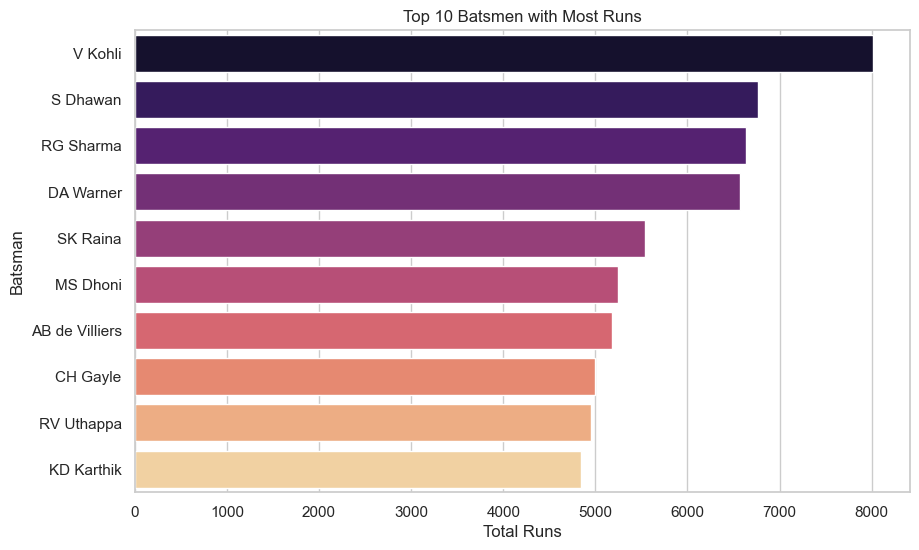

In [216]:
# Total runs scored by each batsman
top_batsmen = df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Display the data
print(top_batsmen)

# Plot it
plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette='magma')
plt.title("Top 10 Batsmen with Most Runs")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")
plt.show()


I grouped the data by each batsman and calculated the total runs they scored. Then, I sorted it in descending order and selected the top 10 batsmen with the most runs.

The bar chart highlights the top 10 batsmen in terms of total runs scored in IPL history. This helps identify consistent performers and major contributors with the bat.

### Part 2: Top 10 Bowlers (Most Wickets Taken)

We’ll count how many times each bowler dismissed a batsman (i.e., got a wicket).

bowler
YS Chahal     213
DJ Bravo      207
PP Chawla     201
SP Narine     200
R Ashwin      198
B Kumar       195
SL Malinga    188
A Mishra      183
JJ Bumrah     182
RA Jadeja     169
Name: count, dtype: int64


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\3405479735.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='viridis')


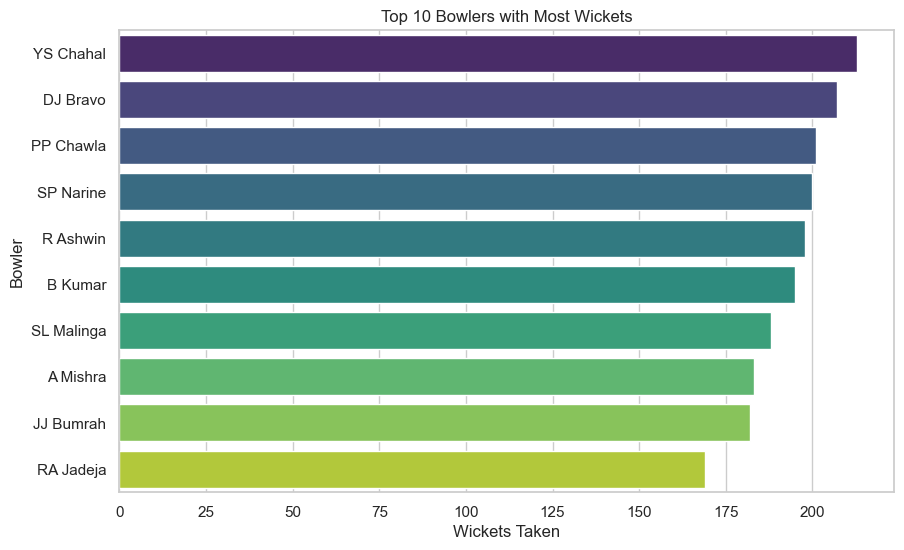

In [224]:
# Filter only rows where a wicket fell
wicket_df = df[df['player_dismissed'] != 'Not Out']

# Count dismissals per bowler
top_bowlers = wicket_df['bowler'].value_counts().head(10)

# Display the data
print(top_bowlers)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x=top_bowlers.values, y=top_bowlers.index, palette='viridis')
plt.title("Top 10 Bowlers with Most Wickets")
plt.xlabel("Wickets Taken")
plt.ylabel("Bowler")
plt.show()


I filtered the dataset to only include deliveries where a wicket actually fell. This ensures that we only count genuine dismissals when identifying top bowlers.

Then I counted how many times each bowler was involved in dismissing a batsman and selected the top 10 wicket-takers.

I used a horizontal bar chart to clearly show the top 10 bowlers based on the number of wickets taken. This gives us an insight into the most successful bowlers in IPL.

### Part 3: Extras Distribution

We'll see how many extra runs were given and of which type.

extras_type
No Extra    246795
wides         8380
legbyes       4001
noballs       1069
byes           673
penalty          2
Name: count, dtype: int64


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\3891477285.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=extra_counts.index, y=extra_counts.values, palette='pastel')


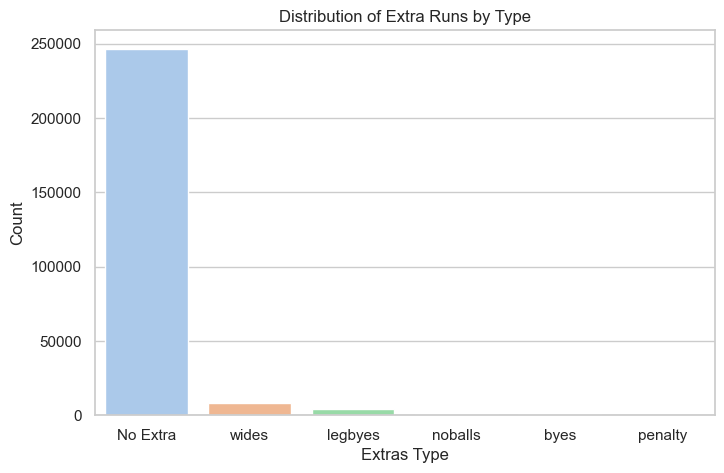

In [233]:
# Count of each extras type
extra_counts = df['extras_type'].value_counts()

# Display the counts
print(extra_counts)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=extra_counts.index, y=extra_counts.values, palette='pastel')
plt.title("Distribution of Extra Runs by Type")
plt.xlabel("Extras Type")
plt.ylabel("Count")
plt.show()


 This chart shows the distribution of extra runs by type. Wide balls appear to be the most common extras in IPL matches, followed by no-balls and leg byes. Understanding extras can help evaluate how disciplined the bowling teams are.


### Part 4: Dismissal Types (How Players Get Out)

Let’s see what kind of dismissals happen most in IPL.

dismissal_kind
caught                   8063
bowled                   2212
run out                  1114
lbw                       800
caught and bowled         367
stumped                   358
retired hurt               15
hit wicket                 15
obstructing the field       3
retired out                 3
Name: count, dtype: int64


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\736036294.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, palette='Set2')


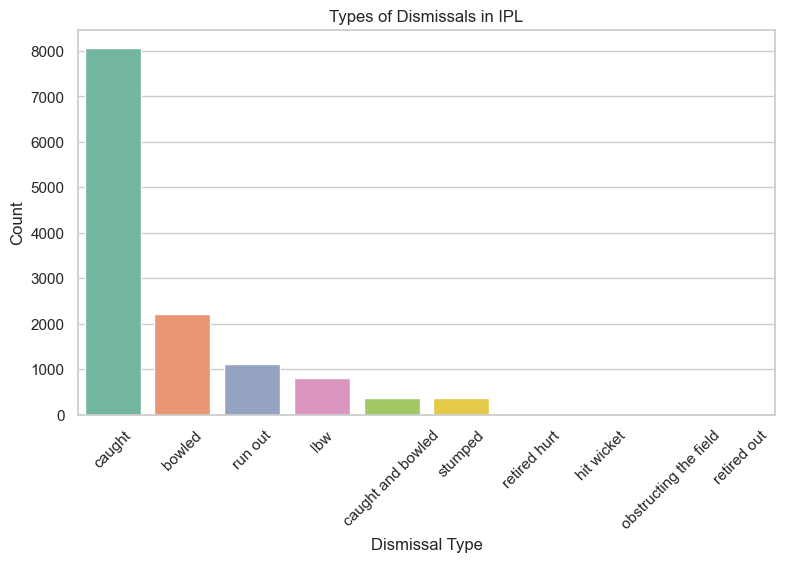

In [238]:
# Filter only rows where a dismissal happened
dismissals = df[df['dismissal_kind'] != 'None']

# Count each dismissal type
dismissal_counts = dismissals['dismissal_kind'].value_counts()

# Show data
print(dismissal_counts)

# Plot
plt.figure(figsize=(9,5))
sns.barplot(x=dismissal_counts.index, y=dismissal_counts.values, palette='Set2')
plt.title("Types of Dismissals in IPL")
plt.xlabel("Dismissal Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()


This visualization shows the various types of dismissals that occur in IPL matches. The most common ones include **caught**, **bowled**, and **run out**. These patterns help understand how wickets typically fall and what strategies bowlers might use in different phases of the game.


## Step 6: Bivariate Analysis (Statistical + Graphical)


### Bivariate Analysis

Bivariate analysis explores the relationship between two variables. It helps identify patterns, correlations, or trends — for example, how one variable affects or relates to another.

In this section, we explore how two variables interact — such as team performance, over-wise scoring, and bowling efficiency.

### Part 1: Total Runs per Over 

We’ll analyze how many total runs are scored in each over (1–20).

over
0     13651
1     16163
2     17895
3     18415
4     18565
5     18528
6     14839
7     15981
8     16639
9     16353
10    16779
11    17076
12    17205
13    17634
14    18149
15    18472
16    19012
17    19559
18    19076
19    17765
Name: total_runs, dtype: int64


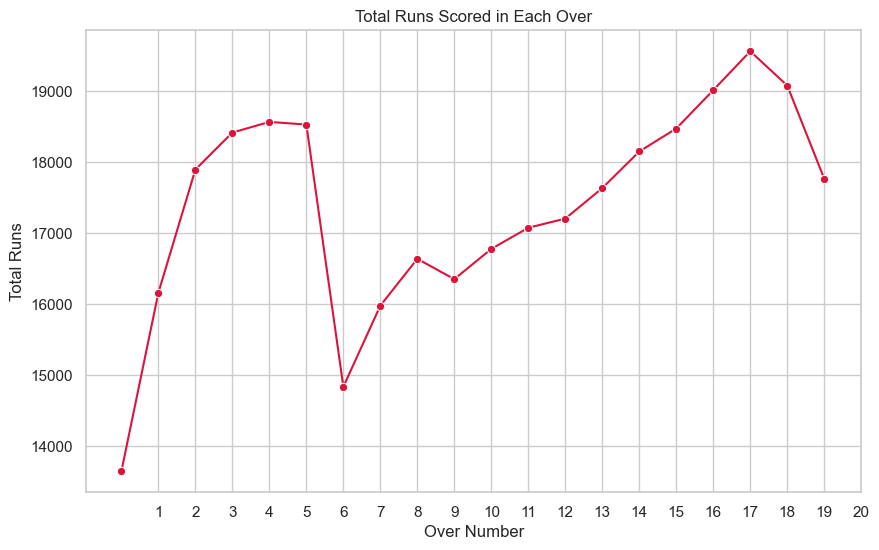

In [246]:
# Group by over and sum total runs
runs_per_over = df.groupby('over')['total_runs'].sum()

# Display
print(runs_per_over)

# Plot
plt.figure(figsize=(10,6))
sns.lineplot(x=runs_per_over.index, y=runs_per_over.values, marker='o', color='crimson')
plt.title("Total Runs Scored in Each Over")
plt.xlabel("Over Number")
plt.ylabel("Total Runs")
plt.xticks(range(1, 21))
plt.grid(True)
plt.show()



This line chart shows how total runs accumulate across each over in IPL matches. As expected, scoring usually picks up in the **death overs** (16–20), while the **middle overs** often show a slight dip due to fielding restrictions being lifted and spinners coming in.


### Part 2: Average Runs per Over (Scoring Efficiency)

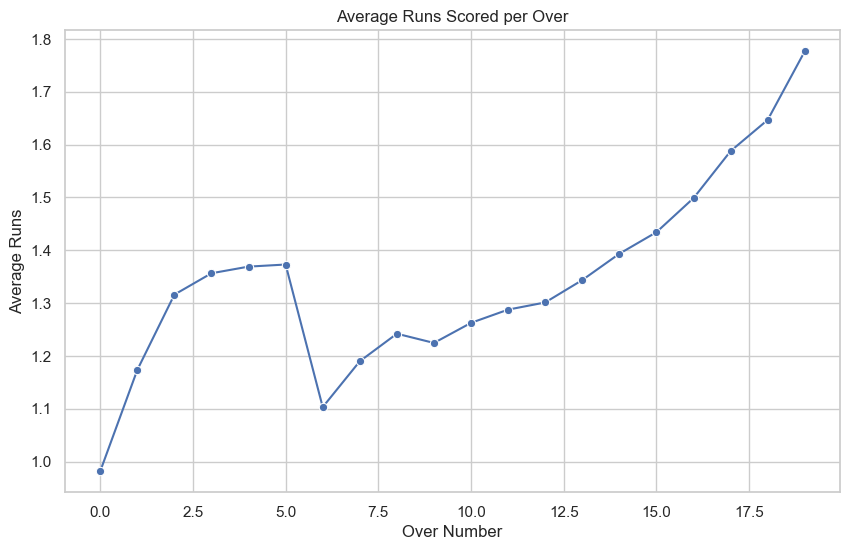

In [250]:
# Average runs scored per over
over_runs = df.groupby('over')['total_runs'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=over_runs.index, y=over_runs.values, marker='o')
plt.title("Average Runs Scored per Over")
plt.xlabel("Over Number")
plt.ylabel("Average Runs")
plt.grid(True)
plt.show()



This plot shows the average number of runs scored in each over across all IPL matches. As expected, the scoring rate starts moderate in the **powerplay (overs 1–6)**, dips slightly in the **middle overs**, and then peaks during the **death overs (16–20)** — reflecting aggressive batting strategies in the final stretch.


### Part 3: Batting Team vs Total Runs

batting_team
Mumbai Indians                 42176
Kolkata Knight Riders          39331
Chennai Super Kings            38629
Royal Challengers Bangalore    37692
Rajasthan Royals               34747
Kings XI Punjab                30064
Sunrisers Hyderabad            29071
Delhi Daredevils               24296
Delhi Capitals                 14900
Deccan Chargers                11463
Punjab Kings                    9536
Gujarat Titans                  7757
Lucknow Super Giants            7510
Pune Warriors                   6358
Gujarat Lions                   4862
Royal Challengers Bengaluru     2930
Rising Pune Supergiant          2470
Rising Pune Supergiants         2063
Kochi Tuskers Kerala            1901
Name: total_runs, dtype: int64


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\1956587229.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.values, y=team_runs.index, palette='coolwarm')


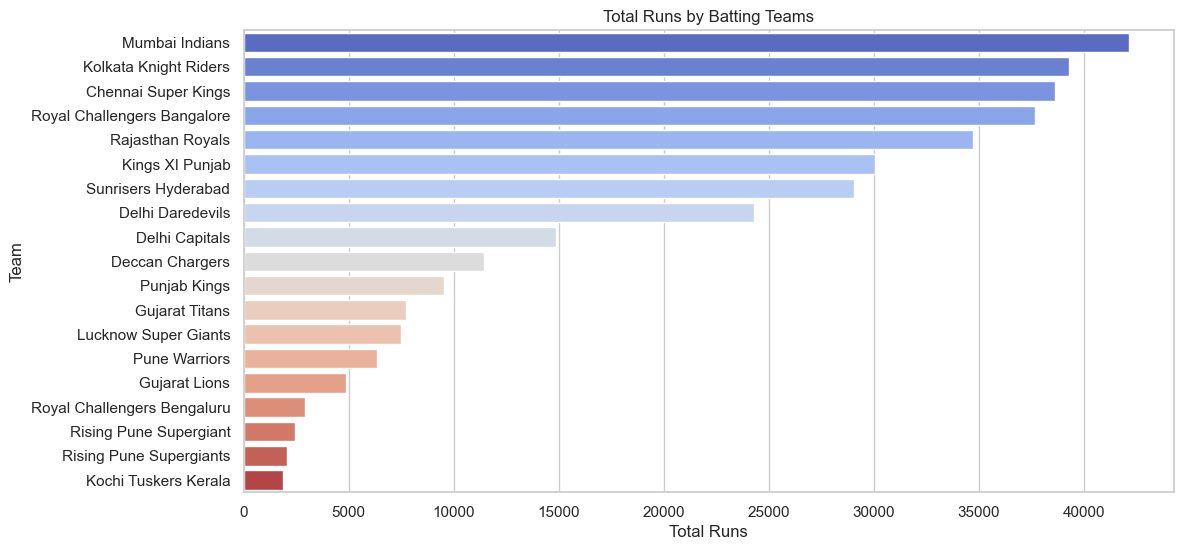

In [254]:
# Total runs scored by each batting team
team_runs = df.groupby('batting_team')['total_runs'].sum().sort_values(ascending=False)

# Display
print(team_runs)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=team_runs.values, y=team_runs.index, palette='coolwarm')
plt.title("Total Runs by Batting Teams")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.show()


This chart highlights the total number of runs scored by each IPL team across all matches. It offers a clear comparison of batting performance and consistency. Teams like **Mumbai Indians** and **Kolkata Knight Riders** tend to dominate the charts due to their strong batting lineups and frequent playoff appearances.


### Part 4: Bowling Team vs Total Wickets

We’ll check how many total wickets each team has taken as a bowling side.

bowling_team
Mumbai Indians                 1591
Chennai Super Kings            1481
Kolkata Knight Riders          1464
Royal Challengers Bangalore    1406
Rajasthan Royals               1277
Kings XI Punjab                1076
Sunrisers Hyderabad            1074
Delhi Daredevils                912
Delhi Capitals                  586
Deccan Chargers                 446
Punjab Kings                    335
Gujarat Titans                  298
Lucknow Super Giants            264
Pune Warriors                   238
Gujarat Lions                   151
Rising Pune Supergiant          113
Royal Challengers Bengaluru      88
Rising Pune Supergiants          76
Kochi Tuskers Kerala             74
Name: count, dtype: int64


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\4067225982.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_wickets.values, y=team_wickets.index, palette='YlGnBu')


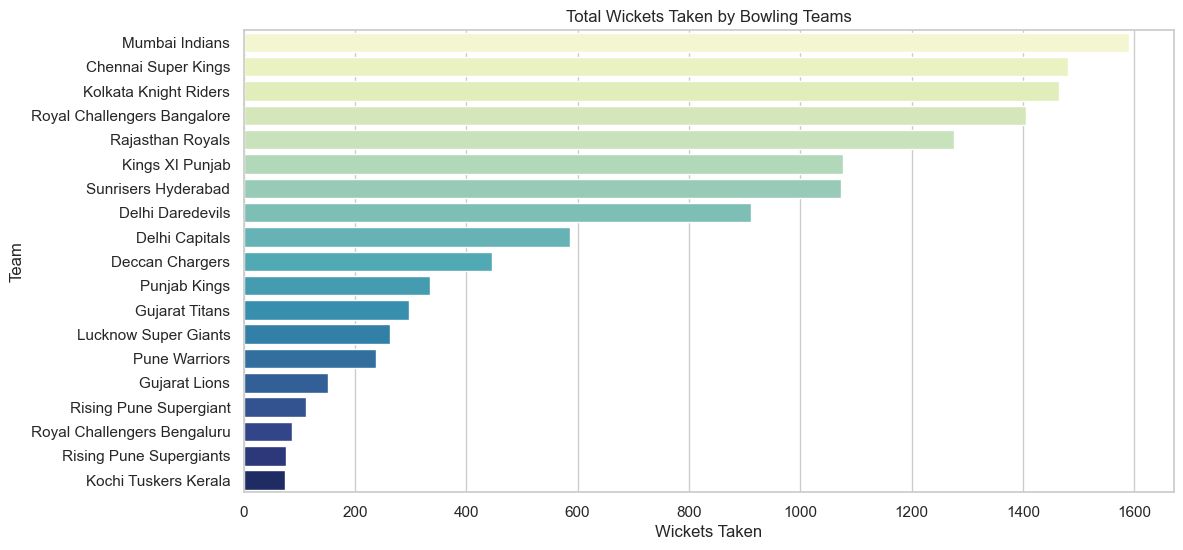

In [259]:
# Filter rows where a wicket was taken
wickets_df = df[df['player_dismissed'] != 'Not Out']

# Count dismissals by bowling team
team_wickets = wickets_df['bowling_team'].value_counts()

# Display
print(team_wickets)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=team_wickets.values, y=team_wickets.index, palette='YlGnBu')
plt.title("Total Wickets Taken by Bowling Teams")
plt.xlabel("Wickets Taken")
plt.ylabel("Team")
plt.show()


This chart represents the total number of wickets taken by each IPL team across all matches. Teams with strong bowling lineups like **Mumbai Indians** and **Chennai Super Kings** usually feature at the top. It reflects the consistency and impact of their bowling units.


### Part 5: Wickets per Innings 

Which innings tends to have more wickets?


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\409963350.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_innings.index, y=wickets_innings.values, palette='Set2')


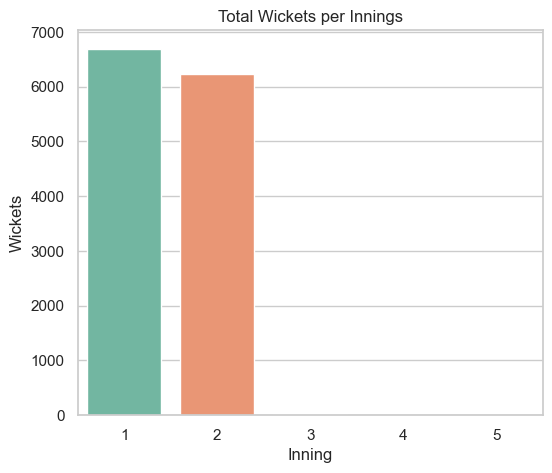

In [263]:
# Total wickets per innings
wickets_innings = df[df['is_wicket'] == 1].groupby('inning').size()

plt.figure(figsize=(6,5))
sns.barplot(x=wickets_innings.index, y=wickets_innings.values, palette='Set2')
plt.title("Total Wickets per Innings")
plt.xlabel("Inning")
plt.ylabel("Wickets")
plt.show()




This chart shows the total number of wickets that fall in the 1st and 2nd innings of IPL matches. While both innings see regular dismissals, small differences may reflect pitch behavior, scoreboard pressure, or chasing strategy in T20 formats.


## Step 7: Multivariate Analysis (Statistical + Graphical)


## What is Multivariate EDA?

**Multivariate = 3 or more variables** involved in the analysis at once.

You look for **complex patterns** or **interactions** between multiple features.

### Part 1: Inning-wise Run Comparison (1st vs 2nd Innings)

In T20 cricket, the strategy and performance can vary drastically between the first and second innings. Here, we analyze how many runs are typically scored in each inning across matches. This helps identify trends, such as whether chasing is harder or teams post bigger totals when batting first.

inning
1    165.547032
2    152.194139
3      9.785714
4      8.785714
5     11.000000
6     15.000000
Name: total_runs, dtype: float64


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\2813960167.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=inning_avg.index, y=inning_avg.values, palette='mako')


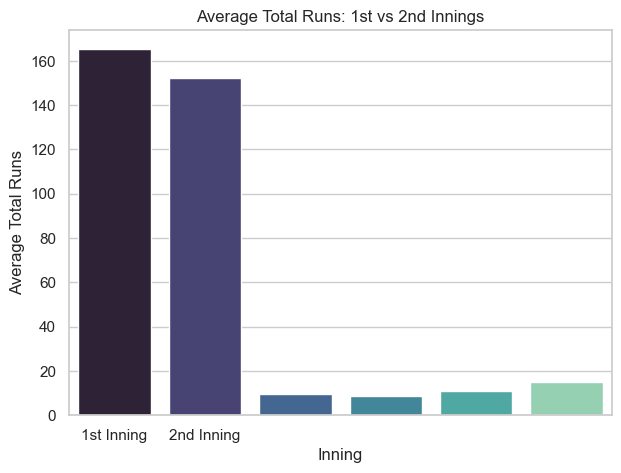

In [271]:
# Total runs per match per inning
inning_runs = df.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()

# Aggregate by innings
inning_avg = inning_runs.groupby('inning')['total_runs'].mean()

# Display
print(inning_avg)

# Plot
plt.figure(figsize=(7,5))
sns.barplot(x=inning_avg.index, y=inning_avg.values, palette='mako')
plt.title("Average Total Runs: 1st vs 2nd Innings")
plt.xlabel("Inning")
plt.ylabel("Average Total Runs")
plt.xticks([0, 1], ['1st Inning', '2nd Inning']) 
plt.show()


This visualization compares the average total runs scored in the 1st and 2nd innings across all IPL matches. It reflects how team strategies may differ while batting first versus chasing. Generally, the 1st innings tends to have a slightly higher run rate as teams aim to set a strong target.


## Part 2: Strike Rate of Top Batsmen

In a fast-paced format like T20, strike rate is a crucial metric to evaluate a batsman's performance. It tells us how quickly a player scores runs — calculated as (total runs / balls faced) * 100.

In this analysis, we calculate the strike rate of batsmen who have faced a minimum number of deliveries (to avoid small-sample bias). This helps highlight consistent big hitters in IPL history.


C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\2717553646.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='strike_rate', y='batter', data=top_strike_rate, palette='Spectral')


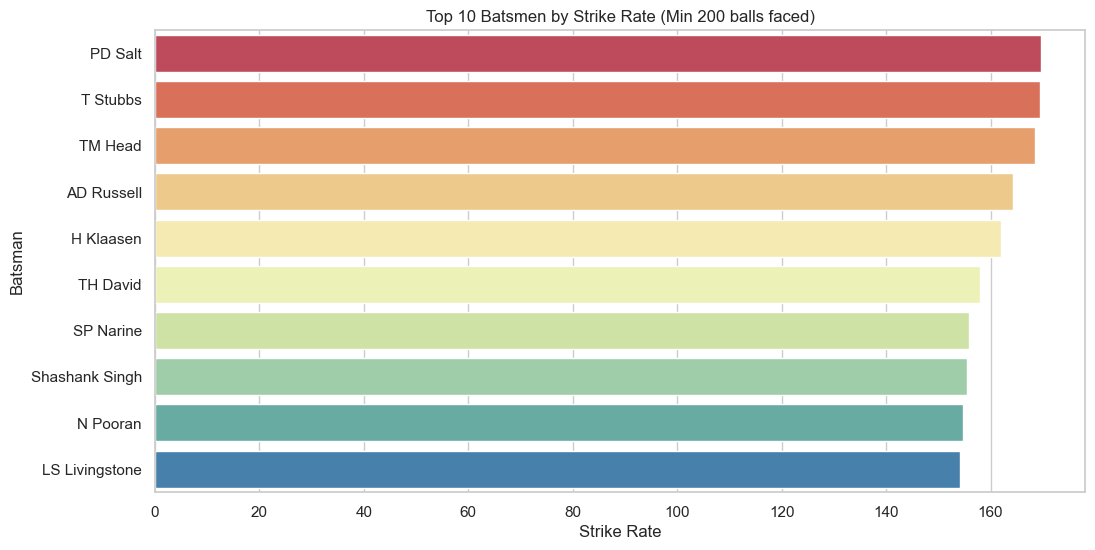

In [277]:
# Count of balls faced and runs scored per batsman
batsman_stats = df.groupby('batter').agg({
    'batsman_runs': 'sum',
    'ball': 'count'
}).rename(columns={'ball': 'balls_faced'}).reset_index()

# Filter batsmen who faced at least 200 balls
batsman_stats = batsman_stats[batsman_stats['balls_faced'] >= 200]

# Calculate strike rate
batsman_stats['strike_rate'] = (batsman_stats['batsman_runs'] / batsman_stats['balls_faced']) * 100

# Top 10 by strike rate
top_strike_rate = batsman_stats.sort_values('strike_rate', ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='strike_rate', y='batter', data=top_strike_rate, palette='Spectral')
plt.title('Top 10 Batsmen by Strike Rate (Min 200 balls faced)')
plt.xlabel('Strike Rate')
plt.ylabel('Batsman')
plt.show()


#### Top 10 Batsmen by Strike Rate (Minimum 200 Balls Faced)

We analyze batsmen who have faced at least 200 balls in the IPL dataset to ensure consistent performance metrics. For each batsman, we calculate the total runs scored and balls faced, and derive their strike rate using the formula:

**Strike Rate = (Runs Scored / Balls Faced) × 100**

We then select the top 10 batsmen with the highest strike rates and visualize them using a **horizontal bar chart**. This helps identify the most aggressive and impactful scorers in the league.


This chart showcases batsmen who score the quickest in IPL — ideal for finishing roles or powerplays. Strike rate often reveals more about match impact than just total runs.



### Part 3: Economy Rate of Bowlers

In T20 cricket, a bowler’s effectiveness isn’t just measured by wickets, but also by how economically they bowl. The economy rate represents the average number of runs conceded per over.

Here, we analyze bowlers who have bowled a significant number of deliveries to find out who has been the most economical in IPL history.

C:\Users\kuruv\AppData\Local\Temp\ipykernel_1696\3648881674.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='economy_rate', y='bowler', data=top_economical, palette='viridis')


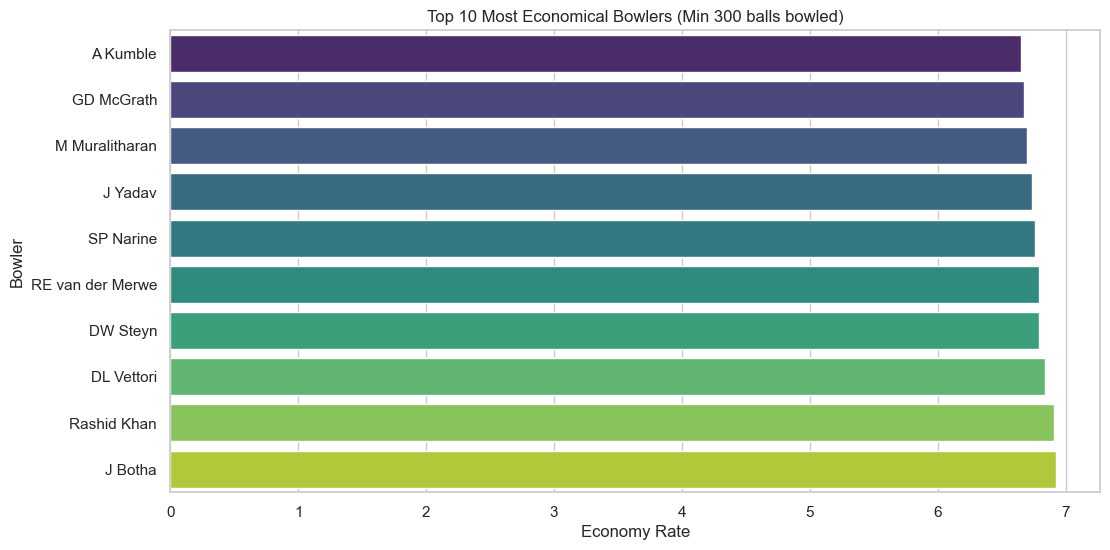

In [284]:
# Group by bowler: total runs conceded and balls bowled
bowler_stats = df.groupby('bowler').agg({
    'total_runs': 'sum',
    'ball': 'count'
}).rename(columns={'ball': 'balls_bowled'}).reset_index()

# Filter: Only include bowlers who have bowled at least 300 balls (~50 overs)
bowler_stats = bowler_stats[bowler_stats['balls_bowled'] >= 300]

# Calculate economy rate
bowler_stats['economy_rate'] = (bowler_stats['total_runs'] / bowler_stats['balls_bowled']) * 6

# Top 10 most economical bowlers
top_economical = bowler_stats.sort_values('economy_rate').head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='economy_rate', y='bowler', data=top_economical, palette='viridis')
plt.title('Top 10 Most Economical Bowlers (Min 300 balls bowled)')
plt.xlabel('Economy Rate')
plt.ylabel('Bowler')
plt.show()


#### Top 10 Most Economical Bowlers (Minimum 300 Balls Bowled)

To assess bowling efficiency, we calculate the **economy rate** for bowlers who have bowled at least 300 deliveries (approximately 50 overs). The economy rate is computed as:

**Economy Rate = (Total Runs Conceded / Balls Bowled) × 6**

We then visualize the top 10 bowlers with the lowest economy rates using a **horizontal bar chart**. This helps highlight the most economical bowlers in the IPL based on consistent performance.


These bowlers consistently contain runs and build pressure — crucial for defending scores or breaking partnerships. Often, they’re match-winners without even needing wickets.

## Final Insights & Conclusion

- **Virat Kohli**, **David Warner**, and **Shikhar Dhawan** are top run scorers across seasons.
- **Bhuvneshwar Kumar**, **Sunil Narine**, and others dominate the wicket charts.
- **Caught** is the most frequent dismissal type, followed by **Bowled** and **LBW**.
- Teams like **MI** and **CSK** consistently display strong batting performances.
- Run scoring peaks in the **death overs (16–20)**, showing how finishers impact games.
- **1st innings** tends to have more wickets, possibly due to pitch freshness or scoreboard pressure.

 This EDA presents a well-rounded statistical snapshot of IPL dynamics from **2008 to 2024**, capturing how the league has evolved over time and offering valuable insights into player and team performances.
